<div style='color: #216969;
           background-color: #EAF6F6;
           font-size: 200%;
           border-radius:15px;
           text-align:center;
           font-weight:600;
           border-style: solid;
           border-color: dark green;
           font-family: "Cambria";'>
Data Preparation
<a class="anchor" id="1"></a> 

In [1]:
# Import NumPy and Pandas libraries

import numpy as np
import pandas as pd

# Import dataset
df = pd.read_csv('Maths.csv')

# Make a copy of the dataframe
df_copy = df.copy()

df.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


In [2]:
# Filter out only categorical variables/ object data type
df_object = df_copy.select_dtypes(['object']).copy()
df_object.head()

# We can try to convert these object datatype data into numeric data

,school,sex,address,famsize,Pstatus,Mjob,Fjob,reason,guardian,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic
0,GP,F,U,GT3,A,at_home,teacher,course,mother,yes,no,no,no,yes,yes,no,no
1,GP,F,U,GT3,T,at_home,other,course,father,no,yes,no,no,no,yes,yes,no
2,GP,F,U,LE3,T,at_home,other,other,mother,yes,no,yes,no,yes,yes,yes,no
3,GP,F,U,GT3,T,health,services,home,mother,no,yes,yes,yes,yes,yes,yes,yes
4,GP,F,U,GT3,T,other,other,home,father,no,yes,yes,no,yes,yes,no,no


<div style='color: #216969;
           background-color: #EAF6F6;
           font-size: 200%;
           border-radius:15px;
           text-align:center;
           font-weight:600;
           border-style: solid;
           border-color: dark green;
           font-family: "Cambria";'>
Data Encoding for Categorical (Object) Columns
<a class="anchor" id="1"></a> 

In [3]:
# 'school' column data

print(df_object['school'].unique())

# Student's School
# For this data, 'GP' = Gabriel Pereira and 'MS' = Mousinho da Silveira
# we will encode GP to 0 and MS to 1 

# 'sex' column data

print(df_object['sex'].unique())

# Student's Sex 
# we will encode Female to 0 and Male to 1

# 'address' column data

print(df_object['address'].unique())

# Student's home address type
# For this data, 'U' = Urban, 'R' = Rural
# we will encode Rural to 0 and Urban to 1 

# 'famsize' column data

print(df_object['famsize'].unique())

# Family Size
# For this data, 'LE3' = Less than or Equal to 3 members and 'GT3' = Greater than 3 members
# we will encode LES3 to 0 and GT3 to 1 

# 'Pstatus' column data

print(df_object['Pstatus'].unique())

# Parent's Cohabitation Status
# For this data, 'A' = parents are living apart and 'T' = parents are living together
# we will encode A to 0 and T to 1 

# 'Mjob' column data

print(df_object['Mjob'].unique())

# Mother's Job
# We will encode at_home to 0, health to 1, services to 2, teacher to 3 and other to 4

# 'Fjob' column data

print(df_object['Fjob'].unique())

# Father's Job
# We will encode at_home to 0, health to 1, services to 2, teacher to 3 and other to 4

# 'reason' column data

print(df_object['reason'].unique())

#Reason to choose this school
# For this data, 'home' = close to home, 'reputation' = school's reputation 
# 'course' = course preference'others' = others
# We will encode home to 0, reputation to 1, course to 2 and other to 3

# 'guardian' column data

print(df_object['guardian'].unique())

#Student's guardian
# We will encode mother to 0, father to 1 and other to 3 

# 'schoolsup' column data

print(df_object['schoolsup'].unique())

#Extra educational support
# We will encode no to 0 and yes to 1

# 'famsup' column data

print(df_object['famsup'].unique())

#Family Education Support
# We will encode no to 0 and yes to 1

# 'paid' column data

print(df_object['paid'].unique())

# Extra paid class within course subject (Math or Por)
# We will encode no to 0 and yes to 1

# 'activities' column data

print(df_object['activities'].unique())

#Extra-Curricular Activities
# We will encode no to 0 and yes to 1 

# 'nursery' column data

print(df_object['nursery'].unique())

#Attended Nursery School
# We will encode no to 0 and yes to 1 

# 'higher' column data

print(df_object['higher'].unique())

#Wants to take Higher Education
# We will encode no to 0 and yes to 1 

# 'internet' column data

print(df_object['internet'].unique())

#Internet Access at Home
# We will encode no to 0 and yes to 1 

# 'romantic' column data

print(df_object['romantic'].unique())

#With a Romantic Relationship
# We will encode no to 0 and yes to 1 

['GP' 'MS']
['F' 'M']
['U' 'R']
['GT3' 'LE3']
['A' 'T']
['at_home' 'health' 'other' 'services' 'teacher']
['teacher' 'other' 'services' 'health' 'at_home']
['course' 'other' 'home' 'reputation']
['mother' 'father' 'other']
['yes' 'no']
['no' 'yes']
['no' 'yes']
['no' 'yes']
['yes' 'no']
['yes' 'no']
['no' 'yes']
['no' 'yes']


In [4]:
# Create dictionary to define replacement values

replacement_map = {'school':{'GP':0,'MS':1},
                   'sex':{'F':0,'M':1},
                  'address':{'R':0,'U':1},
                  'famsize':{'LE3':0,'GT3':1},
                  'Pstatus':{'A':0,'T':1},
                  'Mjob':{'at_home':0,'health':1,'services':2,'teacher':3,'other':4},
                  'Fjob':{'at_home':0,'health':1,'services':2,'teacher':3,'other':4},
                  'reason':{'home':0,'reputation':1,'course':2,'other':3},
                  'guardian':{'mother':0,'father':1,'other':2},
                  'schoolsup':{'no':0,'yes':1},
                  'famsup':{'no':0,'yes':1},
                  'paid':{'no':0,'yes':1},
                  'activities':{'no':0,'yes':1},
                  'nursery':{'no':0,'yes':1},
                  'higher':{'no':0,'yes':1},
                  'internet':{'no':0,'yes':1},
                  'romantic':{'no':0,'yes':1},
                  }

df_copy.replace(replacement_map, inplace=True)

# for binary classification of Pass/Fail grade of student's G3 Grade
df_copy['Pass/Fail'] = df_copy['G3'].apply(lambda x: 0  if (x < 10) else 1)

# for multiple class classification of student's G3 Grade
df_copy['G3_Grade'] = df_copy['G3']
# any score below 10 out of 20 will be considered grade 5 (insufficient)
df_copy['G3_Grade'] = df_copy['G3_Grade'].replace([0,1,2,3,4,5,6,7,8,9], 5)
# any score between 10-11 out of 20 will be considered grade 4
df_copy['G3_Grade'] = df_copy['G3_Grade'].replace([10,11], 4)
# any score between 12-13 out of 20 will be considered grade 3
df_copy['G3_Grade'] = df_copy['G3_Grade'].replace([12,13], 3)
# any score between 14-15 out of 20 will be considered grade 2
df_copy['G3_Grade'] = df_copy['G3_Grade'].replace([14,15], 2)
# any score above 15 out of 20 will be considered grade 1 (execellent)
df_copy['G3_Grade'] = df_copy['G3_Grade'].replace([16,17,18,19,20], 1)

print(df_copy.head())

df_copy.to_csv('processedmath.csv', index=False)

   school  sex  age  address  famsize  Pstatus  Medu  Fedu  Mjob  Fjob  ...  \
0       0    0   18        1        1        0     4     4     0     3  ...   
1       0    0   17        1        1        1     1     1     0     4  ...   
2       0    0   15        1        0        1     1     1     0     4  ...   
3       0    0   15        1        1        1     4     2     1     2  ...   
4       0    0   16        1        1        1     3     3     4     4  ...   

   goout  Dalc  Walc  health  absences  G1  G2  G3  Pass/Fail  G3_Grade  
0      4     1     1       3         6   5   6   6          0         5  
1      3     1     1       3         4   5   5   6          0         5  
2      2     2     3       3        10   7   8  10          1         4  
3      2     1     1       5         2  15  14  15          1         2  
4      2     1     2       5         4   6  10  10          1         4  

[5 rows x 35 columns]


<div style='color: #216969;
           background-color: #EAF6F6;
           font-size: 200%;
           border-radius:15px;
           text-align:center;
           font-weight:600;
           border-style: solid;
           border-color: dark green;
           font-family: "Cambria";'>
Data Exploration
<a class="anchor" id="1"></a> 

In [5]:
# import libraries

import numpy as np
import pandas as pd
from matplotlib.lines import Line2D
import matplotlib.pyplot as plt
from matplotlib.text import Text
from matplotlib.text import Annotation
from pandas.plotting import scatter_matrix
%matplotlib inline

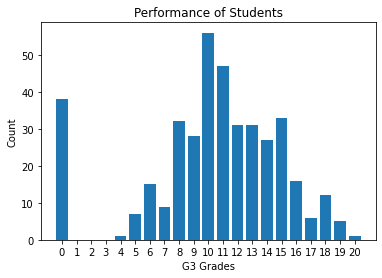

In [6]:
df = pd.read_csv('processedmath.csv')
df.head(10)
df_copy = df.copy()

#  get each unique existing value of G3
X = sorted(df_copy.G3.unique())
#print (X)

Y = []

# code to get the total count for the number of students within each g3 grade category

for i in X :
    #print (i)
    #print (len(df[df.G3 == i]))
    Y = np.append(Y,len(df[df.G3 == i]))

#print (Y)
 
plt.bar(X, Y, align='center')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Bar Plot')
plt.title('Performance of Students')
plt.xlabel('G3 Grades')
plt.ylabel('Count')
plt.xticks(np.arange(21))
plt.show()

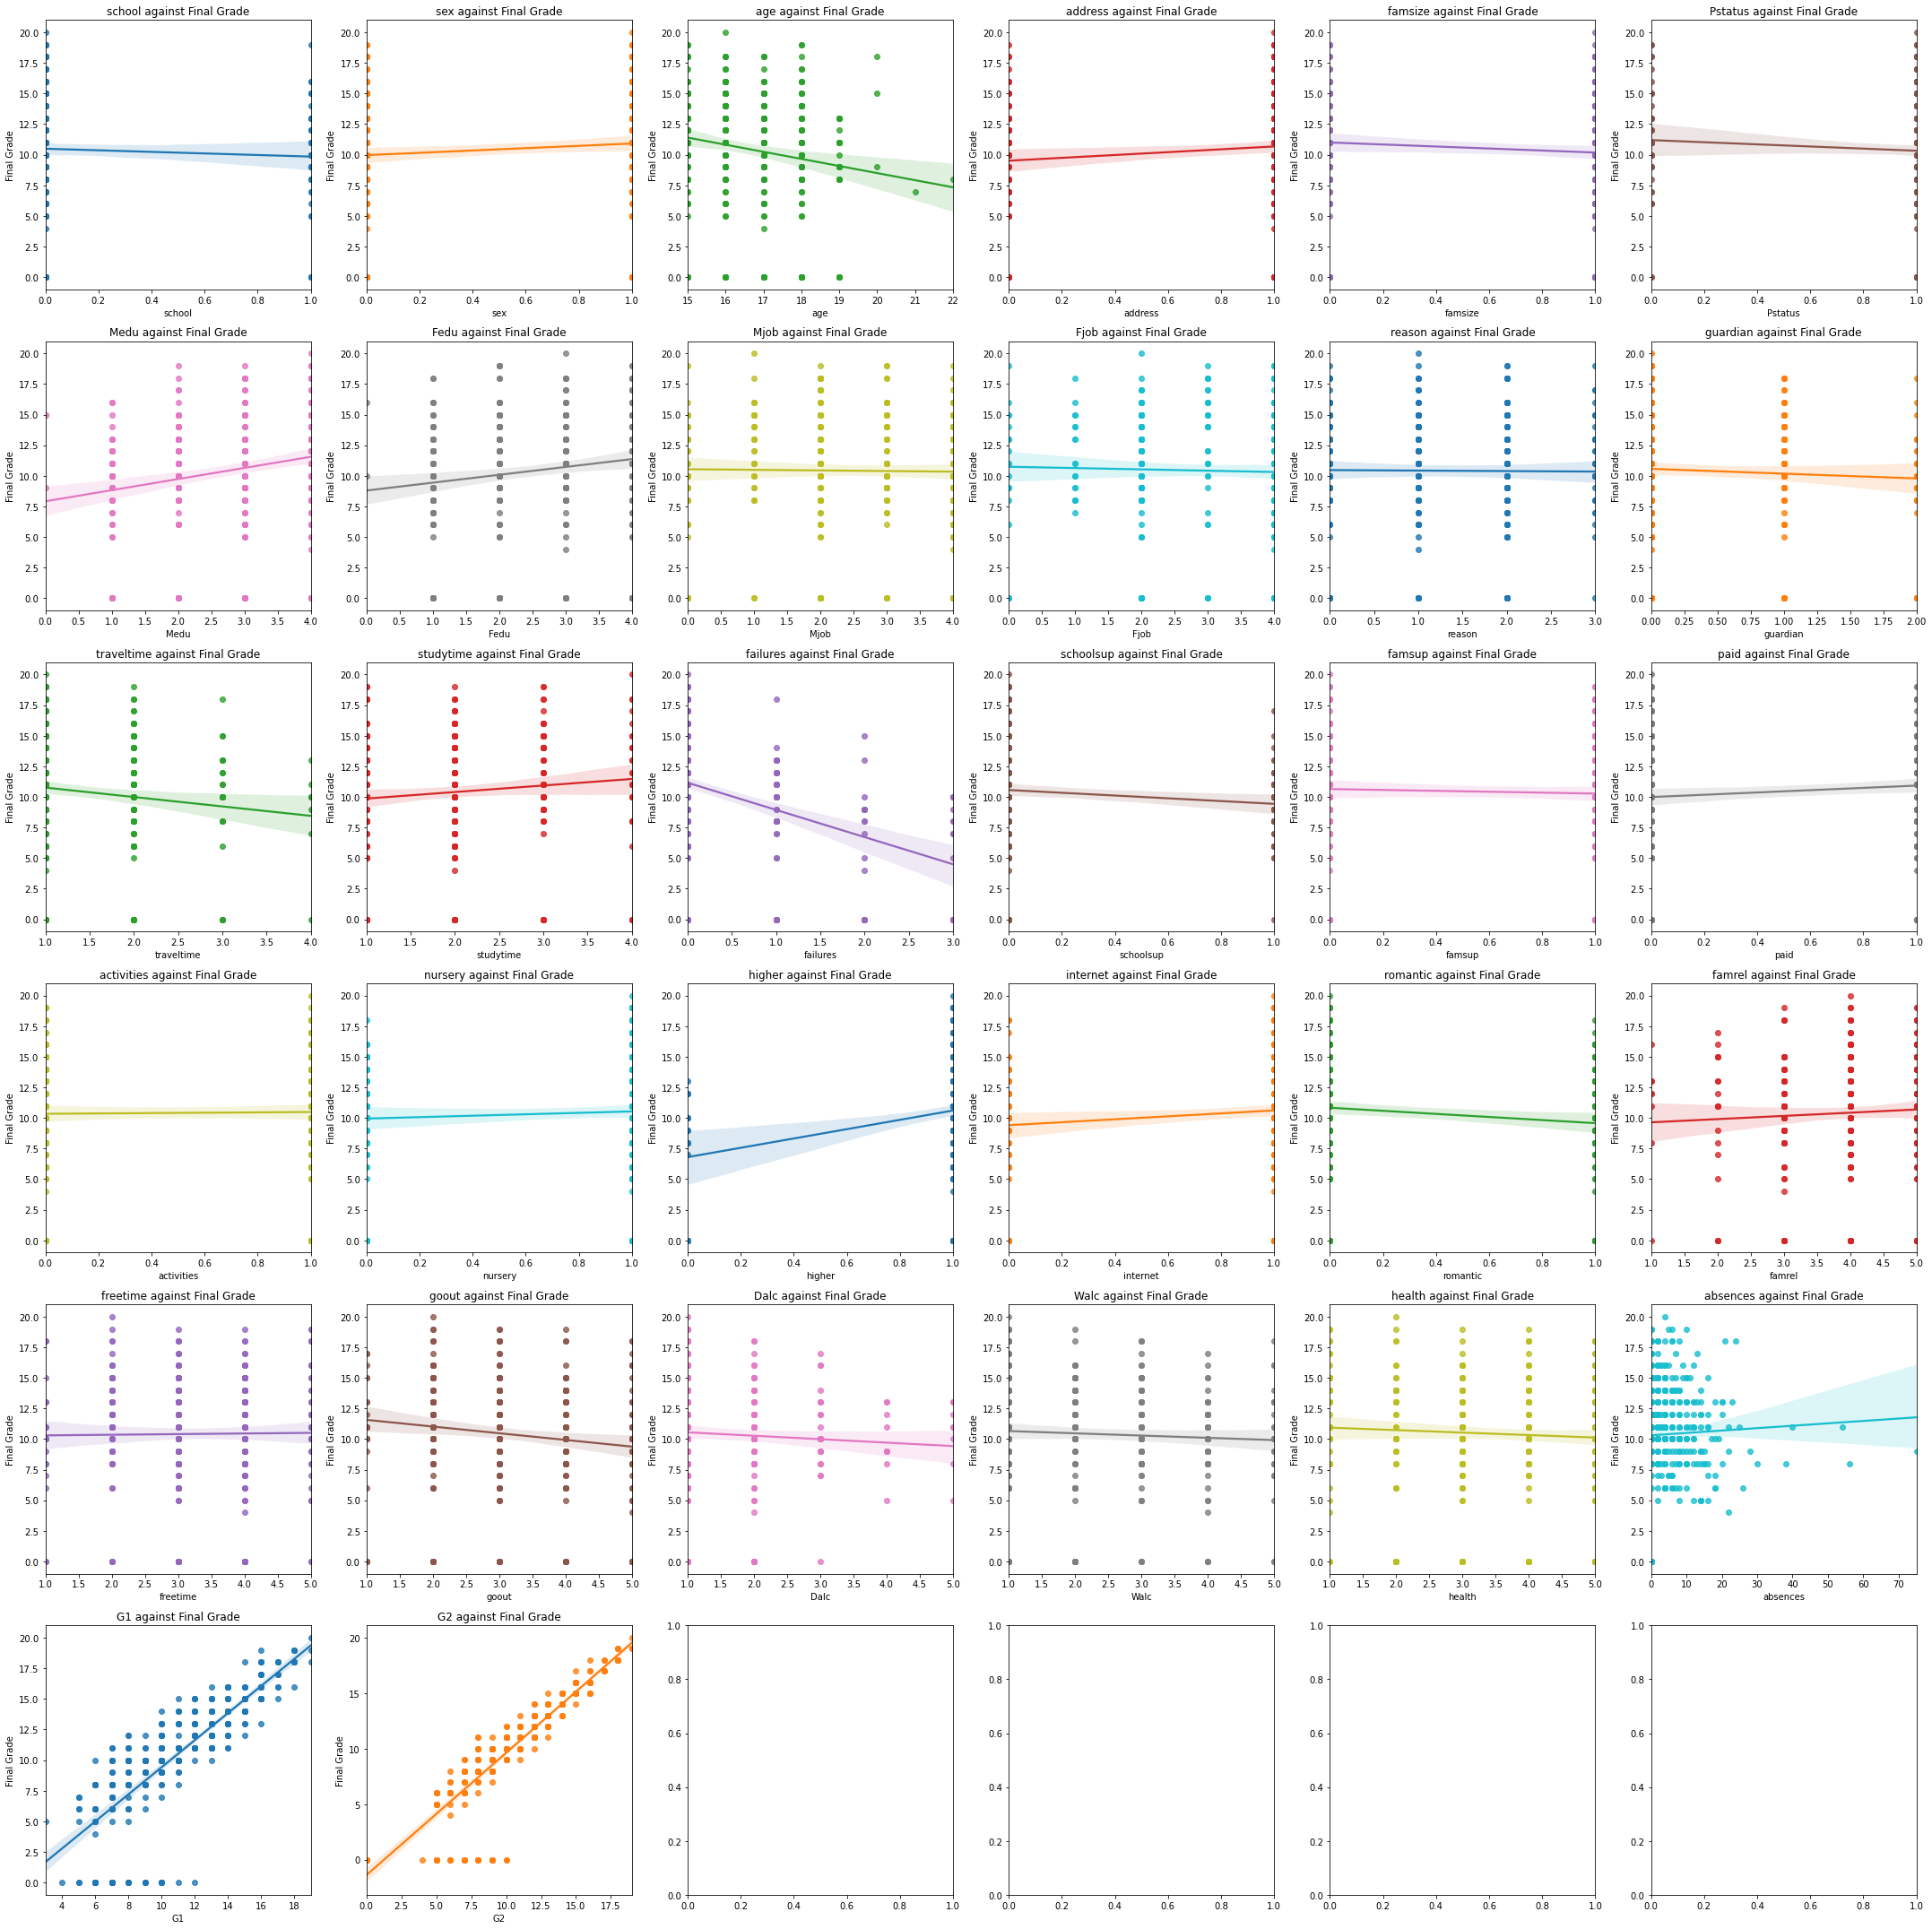

In [14]:
#Scatter Plot with Trend Lines

df_numerical = df_copy.loc[:, :"G2"]
import seaborn as sns
import matplotlib.pyplot as plt

fig, axs = plt.subplots(6,6, figsize=(30,30)) #(2,4) means plot in two by four, figsize is to change the size
palette =  sns.color_palette(n_colors=6 * 6) # 6 * 6 colors, one for each fig
i=0;
for feature, ax in zip(df_numerical.columns, axs.ravel()): #zip is to go through two list at the same time at the same index position
    
    sns.regplot(x=(df_numerical[feature]), y=(df_copy["G3"]), ax=ax, color=palette[i]);
    i+=1
    ax.set_xlabel(feature)
    ax.set_ylabel("Final Grade")
    ax.set_title(f"{feature} against Final Grade")
    
fig.tight_layout()